In [2]:
import re
import warnings
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly
import math

from plotly.subplots import make_subplots

warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.max_columns = 300
pyo.init_notebook_mode()

## Среднемесячная номинальная начисленная заработная плата


Загружаем данные с двух листов из файла, исправялем названия колонок, убираем строки без данных:

In [3]:
new_data = pd.read_excel('tab3-zpl_2023.xlsx', sheet_name='с 2017 г.', header=4)
old_data = pd.read_excel('tab3-zpl_2023.xlsx', sheet_name='2000-2016 гг.', header=2)

new_data = new_data.set_axis(['Отрасль'] + [str(x) for x in range(2017, 2024)], axis='columns')
old_data = old_data.set_axis(['Отрасль'] + [str(x) for x in range(2000, 2017)], axis='columns')

new_data = new_data.dropna(how='any')
old_data = old_data.dropna(how='any')

Далее нужно совместить виды деятельности с листов 2000-2016 и 2017-2023, чтобы получить полную картину. На листе 2017-2023 более мелкое дробление видов, поэтому совместить их так просто не получится. Но у некоторых видов просто изменилось название, будем работать с ними:

In [4]:
col_name_mapping = {
    'Рыболовство, рыбоводство': 'Рыболовство и рыбоводство',
    'Производство кожи, изделий из кожи и производство обуви': 'Производство кожи и изделий из кожи',
    'Производство резиновых и пластмассовых изделий': 'Производство резиновых и пластмассовых изделий',
    'Торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов': 'Оптовая и розничная торговля; ремонт автотранспортных средств, мотоциклов, бытовых изделий и предметов личного пользования',
    'Деятельность финансовая и страховая': 'Финансовая деятельность',
    'Государственное управление и обеспечение военной безопасности; социальное обеспечение': 'Государственное управление и обеспечение военной безопасности; социальное страхование',
    'Деятельность в области здравоохранения и социальных услуг': 'Здравоохранение и предоставление социальных услуг',
    'Всего': 'Средняя',
    'Всего по экономике': 'Средняя',
}

def sanitaze_str(str):
    str = str.strip().capitalize()
    str = re.sub(r'\s{2,}', ' ', str)
    if str in col_name_mapping:
        str = col_name_mapping[str]
    return str

new_data['Отрасль'] = new_data['Отрасль'].apply(sanitaze_str)
old_data['Отрасль'] = old_data['Отрасль'].apply(sanitaze_str)
data = old_data.merge(new_data, on='Отрасль')

data

Отрасль    2000    2001  \
0                                             Средняя  2223.4  3240.4   
1                           Рыболовство и рыбоводство  2845.6  3839.3   
2                          Добыча полезных ископаемых  5940.2  9099.2   
3                         Обрабатывающие производства  2365.2  3446.6   
4                 Производство кожи и изделий из кожи  1347.8  1986.1   
5                 Производство кокса и нефтепродуктов  4916.3  7012.4   
6      Производство резиновых и пластмассовых изделий  2140.4  3032.2   
7                                       Строительство  2639.8  3859.3   
8   Оптовая и розничная торговля; ремонт автотранс...  1584.5  2294.9   
9                             Финансовая деятельность  5232.2  8885.2   
10  Государственное управление и обеспечение военн...  2712.1  3754.9   
11                                        Образование  1240.2  1833.0   
12  Здравоохранение и предоставление социальных услуг  1333.3  1959.9   

       2002     2003     2004     2005     2006     2007     2008     2009  \
0    4360.3   5498.5   6739.5   8554.9  10633.9  13593.4  17290.1  18637.5   
1    5031.3   5444.5   7084.9  10233.5  12310.8  14797.0  19498.9  22913.5   
2   11080.9  13912.4  16841.7  19726.9  23145.2  28107.5  33206.1  35363.4   
3    4439.1   5603.4   6848.9   8420.9  10198.5  12878.7  16049.9  16583.1   
4    2621.1   3230.0   3774.7   4695.3   5649.1   7537.0   9522.3  10073.2   
5    9625.3  11879.0  13729.3  19397.1  22319.6  28565.0  34912.5  37963.7   
6    3957.1   4950.7   5956.8   6879.2   8767.7  11082.6  13464.0  13850.6   
7    4806.9   6176.7   7304.7   9042.8  10869.2  14333.4  18574.0  18122.2   
8    3068.9   3974.2   4906.2   6552.1   8234.9  11476.3  14927.4  15958.6   
9   13245.9  15561.2  17383.8  22463.5  27885.5  34879.8  41871.8  42372.9   
10   5200.4   6913.8   7898.6  10958.5  13477.3  16896.3  21344.1  23960.0   
11   2927.3   3386.6   4203.4   5429.7   6983.3   8778.3  11316.8  13293.6   
12   3141.3   3662.6   4612.0   5905.6   8059.9  10036.6  13048.6  14819.5   

       2010     2011     2012     2013     2014     2015     2016     2017  \
0   20952.2  23369.2  26628.9  29792.0  32495.0  34030.0  36709.0  39167.0   
1   23781.9  25939.9  29201.4  32437.3  37062.0  46676.0  54927.0  68032.0   
2   39895.0  45132.0  50400.6  54161.2  58959.0  63695.0  69936.0  74474.1   
3   19078.0  21780.8  24511.7  27044.5  29511.0  31910.0  34592.0  38501.5   
4   11345.8  12350.9  13135.7  14725.1  16119.0  17796.0  19847.0  20193.0   
5   41563.4  48462.6  59195.0  64760.1  75517.0  81605.0  88194.0  95956.7   
6   15766.4  17713.3  19758.3  21599.3  23270.0  25006.0  27565.0  30621.8   
7   21171.7  23682.0  25950.6  27701.4  29354.0  29960.0  32332.0  33677.9   
8   18405.9  19613.2  21633.8  23167.8  25601.0  26947.0  30030.0  32092.5   
9   50120.0  55788.9  58999.2  63333.0  68565.0  70088.0  80289.0  84904.0   
10  25120.8  27755.5  35701.4  40448.7  42659.0  41916.0  43611.0  43499.7   
11  14075.2  15809.1  18995.3  23457.9  25862.0  26928.0  28088.0  30257.6   
12  15723.8  17544.5  20640.7  24438.6  27068.0  28179.0  29742.0  31980.3   

       2018      2019      2020      2021      2022      2023  
0   43724.0   47866.8   51344.0   57243.7   65338.3   73709.3  
1   75766.0   88603.8   94983.0  101547.4  121726.2  139520.0  
2   83178.0   89343.7   95359.0  103473.5  118375.7  130825.6  
3   40722.0   43855.0   46510.0   52409.6   60438.7   71273.3  
4   23576.0   25680.3   26913.0   31771.2   36445.0   44039.1  
5   87591.0   81685.2   82106.0   87214.4   97720.3  109541.0  
6   33581.0   35623.4   39662.0   44817.4   51471.0   61423.1  
7   38518.0   42629.9   44738.0   51944.2   60849.5   68944.4  
8   35444.0   40137.0   41867.0   50388.8   57806.1   63572.2  
9   91070.0  103667.8  112680.0  130223.3  146637.1  169105.7  
10  47803.0   50990.5   54496.0   58620.3   63505.2   73860.9  
11  34361.0   37071.9   39563.0   43390.5   48400.2   54262.7  
12  4

Построим графики среднемесячной з/п для видов деятельности 'Образование', 'Финансовая деятельность', 'Строительство':

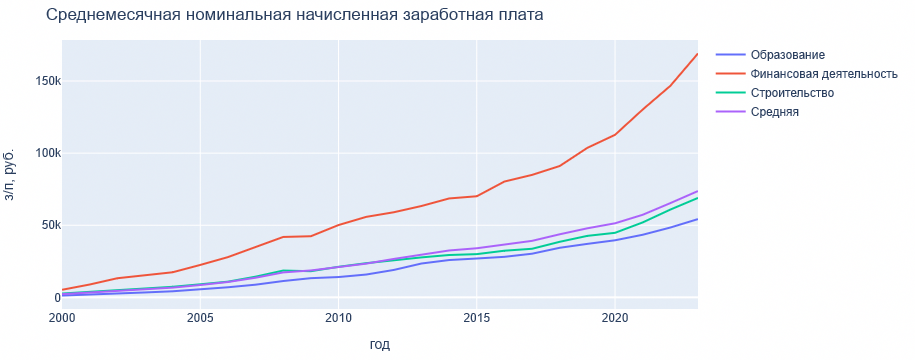

In [5]:
def get_line(data, name):
    line = data[data['Отрасль'] == name].drop(['Отрасль'], axis=1)
    line = line.squeeze()
    line.index = line.index.map(int)
    return line

# выбранные отрасли + среднее по всем отраслям
lines = ['Образование', 'Финансовая деятельность', 'Строительство', 'Средняя']

fig = go.Figure()
for name in lines:
    dt = get_line(data, name)
    fig.add_trace(go.Scatter(x=dt.index, y=dt.array, name=name))
fig.update_layout(title='Среднемесячная номинальная начисленная заработная плата',
                  xaxis_title='год', yaxis_title='з/п, руб.',
                  margin=dict(l=20, r=10, t=40, b=10))
pyo.iplot(fig)

Во сколько раз выросла номинальная з/п за эти годы:

In [6]:
grow_nom = data[data['Отрасль'] == 'Средняя']
grow_nom = (grow_nom['2023'] / grow_nom['2000']).iloc[0]
grow_nom

33.151614644238556

Наименьшие и наибольшие з/п по состоянию на 2023 г.:

In [7]:
new_data.loc[new_data['2023'].idxmin()].iloc[0], new_data.loc[new_data['2023'].idxmax()].iloc[0]

('Производство одежды', 'Добыча нефти и природного газа')

In [8]:
minmax = new_data[['Отрасль', '2023']]
minmax = minmax.set_index('Отрасль')
minmax = minmax['2023'].sort_values()

fig = go.Figure()
fig.add_trace(go.Bar(x=minmax.index, y=minmax.array))
fig.update_layout(title='З/п на 2023 г. по отраслям', xaxis_visible=False,
                  yaxis_title='з/п, руб.',
                  margin=dict(l=20,r=20,b=10,t=40))
pyo.iplot(fig)

### Выводы
1. З/п по всем отраслям растут. Без учета инфляции, рост номинальной средней з/п более чем в 33 раза за 2000-2023 гг.
2. Наименьшие з/п в легкой промышленности (производство одежды), наибольшие - в добыче нефти и газа.

## Инфляция и реальная з/п
Загружаем данные по инфляции, оставляем только колонку с годовой инфляцией:

In [9]:
infl = pd.read_excel('inflation.xlsx', index_col='Год')
infl = infl['Всего']
infl.name = 'Инфляция'
infl = infl.iloc[1:]
infl = infl.sort_index()

Учитываем накопленную инфляцию, т.е. делаем дисконтирование зарплат в цены 2000 года. Шкала на графике логарифмическая.

In [10]:
# новые цены в старые
def discount(year_from, year_to, sum):
    result = sum
    for x in range(year_from, year_to, -1):
        result /= 1.0 + infl.loc[x] / 100.0
    return result

In [11]:
data_2000 = data.copy()

for year in range(2000, 2023+1):
    data_2000[str(year)] = discount(year, 2000, data_2000[str(year)])

color, colors = 0, plotly.colors.qualitative.Plotly
fig = go.Figure()

for name in lines:
    dt = get_line(data, name)
    dt_real = get_line(data_2000, name)
    fig.add_trace(go.Scatter(x=dt_real.index, y=dt_real.array, name=name + ' с учетом инфл.', line=dict(color=colors[color])))
    fig.add_trace(go.Scatter(x=dt.index, y=dt.array, name=name, line=dict(dash='dot', color=colors[color])))
    color += 1

fig.update_layout(xaxis_title='год', yaxis_title='з/п, руб.', yaxis_type='log',
                  margin=dict(l=20,r=20,b=10,t=40))

pyo.iplot(fig)

Для наглядности также приведем зарплаты к уровню цен 2023 г.:

In [12]:
# старые цены в новые
def compound(year_from, year_to, sum):
    result = sum
    for x in range(year_from, year_to):
        result *= 1.0 + infl.loc[x] / 100.0
    return result


In [13]:
data_2023 = data.copy()

for year in range(2000, 2023+1):
    data_2023[str(year)] = compound(year, 2023, data_2023[str(year)])

fig = go.Figure()
for name in lines:
    dt = get_line(data_2023, name)
    fig.add_trace(go.Scatter(x=dt.index, y=dt.array, name=name))

fig.update_layout(title='Среднемесячная реальная начисленная заработная плата в ценах 2023 г.',
                  xaxis_title='год', yaxis_title='з/п, руб.',
                  margin=dict(l=20,r=20,b=40,t=50))

pyo.iplot(fig)

Во сколько раз выросла реальная з/п за эти годы:

In [14]:
grow_real = data_2000[data_2000['Отрасль'] == 'Средняя']
grow_real = (grow_real['2023'] / grow_real['2000']).iloc[0]
grow_real

4.458280785233497

### Влияние инфляции на изменение з/п
Сравним изменение з/п год к году с уровнем инфляции:

In [15]:
dt = data.transpose()
dt = dt.set_axis(dt.iloc[0], axis='columns')
dt = dt.iloc[1:]
dt.index.name = 'Год'
dt.index = dt.index.map(int)
dt = dt.pct_change() * 100.0
dt = dt.iloc[1:]
# dt = dt.subtract(infl[infl.index > 2000], axis=0)
dt.join(infl)[lines + ['Инфляция']].transpose()


Год                           2001       2002       2003       2004  \
Образование              47.798742  59.699945  15.690226  24.118585   
Финансовая деятельность  69.817668  49.078242  17.479371  11.712464   
Строительство            46.196682  24.553676  28.496536  18.262179   
Средняя                  45.740757  34.560548  26.103708  22.569792   
Инфляция                 18.580000  15.060000  11.990000  11.740000   

Год                           2005       2006       2007       2008  \
Образование              29.174002  28.612999  25.704180  28.917900   
Финансовая деятельность  29.220884  24.136933  25.082211  20.045987   
Строительство            23.794269  20.197284  31.871711  29.585444   
Средняя                  26.936716  24.301862  27.830805  27.194815   
Инфляция                 10.910000   9.000000  11.870000  13.280000   

Год                           2009       2010       2011       2012  \
Образование              17.467835   5.879521  12.318830  20.154215   
Финансовая деятельность   1.196748  18.283148  11.310654   5.754370   
Строительство            -2.432432  16.827427  11.856866   9.579427   
Средняя                   7.792899  12.419584  11.535781  13.948702   
Инфляция                  8.800000   8.780000   6.100000   6.580000   

Год                           2013       2014       2015       2016      2017  \
Образование              23.493180  10.248573   4.121878   4.307784  7.724295   
Финансовая деятельность   7.345523   8.261096   2.221250  14.554560  5.747985   
Строительство             6.746665   5.965763   2.064455   7.917223  4.162749   
Средняя                  11.878448   9.072905   4.723804   7.872465  6.695906   
Инфляция                  6.450000  11.360000  12.910000   5.380000  2.520000   

Год                           2018       2019      2020       2021       2022  \
Образование              13.561551   7.889468  6.719645   9.674443  11.545615   
Финансовая деятельность   7.262320  13.833095  8.693345  15.569134  12.604350   
Строительство            14.371739  10.675269  4.945121  16.107560  17.143974   
Средняя                  11.634795   9.474888  7.264325  11.490534  14.140595   
Инфляция                  4.270000   3.050000  4.910000   8.390000  11.920000   

Год                           2023  
Образование              12.112553  
Финансовая деятельность  15.322589  
Строительство            13.303150  
Средняя                  12.811781  
Инфляция                  7.420000

Отобразим года, в которые з/п росла быстрее или медленнее инфляции.

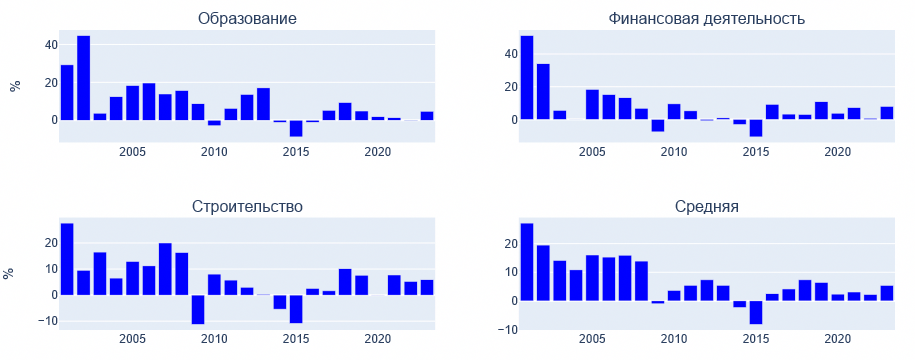

In [16]:
n = 0
fig = make_subplots(rows=math.ceil(len(lines) / 2.0), cols=2, subplot_titles=lines)
for line in lines:
    bar = dt[line] - infl[infl.index > 2000]
    row = n // 2 + 1
    col = n % 2 + 1
    fig.add_trace(go.Bar(x=bar.index, y=bar.array, name=line, marker_color='blue'), col=col, row=row)
    if col == 1:
        fig.update_yaxes(title_text='%', row=row, col=col)
    n += 1
fig.update_layout(showlegend=False, margin=dict(l=20, r=20, t=30, b=30))
pyo.iplot(fig)

Примерно до кризиса 2008 г. наблюдался рост реальной з/п даже в условиях высокой (двузначной) инфляции. После этого периода наблюдается обратное: замедление роста или даже снижение реальной з/п вслед за высокой инфляцией.

In [17]:
# корреляция изменения з/п с инфляцией предыдущего года да и после примерно 2008 г
dx = dt.subtract(infl[infl.index > 2000], axis=0)['Средняя']
dx[dx.index <= 2008].corr(infl), dx[dx.index > 2008].corr(infl)

(0.8087816725946815, -0.7259287961363879)

### Выводы
1. Средняя реальная з/п по всем отраслям выросла в ~4.5 раза за 2000-2023.
2. Рост номинальной средней (без учета инфляции) з/п отличается от скорректированного показателя более чем в 7 раз. Накопленная инфляция оказывает значительный эффект на итоговые цифры.
3. До кризиса 2008 реальная з/п росла выше инфляции, несмотря на ее высокий уровень. После 2008 реальная з/п обычно снижалась вслед за достижением двузначного уровня инфляции.

## Дополнительные исследования

Посмотрим на зависимость изменения реальной з/п и следующих показателей:
- [Коэффициент Джини](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%94%D0%B6%D0%B8%D0%BD%D0%B8)
- [Уровень безработицы](https://rosstat.gov.ru/storage/mediabank/Trud-3_15-72.xlsx)
- [Индекс счастья](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B6%D0%B4%D1%83%D0%BD%D0%B0%D1%80%D0%BE%D0%B4%D0%BD%D1%8B%D0%B9_%D0%B8%D0%BD%D0%B4%D0%B5%D0%BA%D1%81_%D1%81%D1%87%D0%B0%D1%81%D1%82%D1%8C%D1%8F)
- [ВВП](https://rosstat.gov.ru/storage/mediabank/VVP_god_s_1995.xlsx)

In [18]:
# загружаем коэф. Джини
gini = pd.read_excel('tab_1-2-5.xlsx', sheet_name='РФ и субъекты РФ 1995-2022', header=2)
gini = gini.iloc[:1].drop([gini.columns[0]] + list(gini.columns[-2:]), axis='columns')
gini = gini.transpose().rename({ 0: 'Коэф Джини' }, axis=1).sort_index()
gini.index.name = 'Год'

# данные по безработице
labour = pd.read_excel('Trud-3_15-72.xlsx', sheet_name='2', header=4)
labour = labour.iloc[:1].drop([labour.columns[0]], axis=1)
labour = labour.set_axis([x for x in range(2000, 2024)], axis='columns')
labour = labour.transpose().rename({ 0: 'Уровень безработицы' }, axis=1)
labour.index.name = 'Год'

# индекс счастья
happy = pd.read_excel('happy.xlsx', index_col='Год')

# ВВП
gdp1 = pd.read_excel('VVP_god_s_1995.xlsx', sheet_name='1', header=2)
gdp1 = gdp1.iloc[:1]
gdp1 = gdp1.set_axis([x for x in range(1995, 2012)], axis='columns')
gdp1 = gdp1.transpose().rename({ 0: 'ВВП' }, axis=1)
gdp1.index.name = 'Год'
gdp1 = gdp1.drop(2011, axis=0)

gdp2 = pd.read_excel('VVP_god_s_1995.xlsx', sheet_name='2', header=3)
gdp2 = gdp2.iloc[:1]
gdp2 = gdp2.set_axis([x for x in range(2011, 2024)], axis='columns')
gdp2 = gdp2.transpose().rename({ 0: 'ВВП' }, axis=1)
gdp2.index.name = 'Год'

gdp = pd.concat([gdp1, gdp2])

# объединяем все в таблицу
add = gini.join(labour).join(happy).join(gdp)
add.transpose()

Год                       1995       1996      1997      1998       1999  \
Коэф Джини               0.387      0.387      0.39     0.394        0.4   
Уровень безработицы        NaN        NaN       NaN       NaN        NaN   
Индекс счастья             NaN        NaN       NaN       NaN        NaN   
ВВП                  1428.5221  2007.8251  2342.514  2629.623  4823.2335   

Год                       2000       2001     2002          2003         2004  \
Коэф Джини               0.395      0.397    0.397         0.403        0.409   
Уровень безработицы       10.6          9      7.9           8.2          7.8   
Индекс счастья             NaN        NaN      NaN           NaN          NaN   
ВВП                  7305.6463  8943.5824  10830.5  13208.233779  17027.19086   

Год                          2005          2006          2007          2008  \
Коэф Джини                  0.409         0.415         0.422         0.421   
Уровень безработицы           7.1           7.1           6.0           6.2   
Индекс счастья                NaN     30.484132     31.384561     33.076654   
ВВП                  21609.765489  26917.201375  33247.513229  41276.849187   

Год                          2009         2010          2011          2012  \
Коэф Джини                  0.421        0.421         0.417          0.42   
Уровень безработицы           8.3          7.3           6.5           5.5   
Индекс счастья          32.642445    33.429024      32.30068     34.331369   
ВВП                  38807.218575  46308.54119  60114.000837  68103.449628   

Год                         2013          2014          2015          2016  \
Коэф Джини                 0.417         0.415         0.412         0.412   
Уровень безработицы          5.5           5.2           5.6           5.5   
Индекс счастья         34.096063     37.022411     38.069522     37.481049   
ВВП                  72985.70113  79030.040075  83087.360055  85616.083815   

Год                          2017           2018           2019          2020  \
Коэф Джини                  0.411          0.414          0.412         0.406   
Уровень безработицы           5.2            4.8            4.6           5.8   
Индекс счастья           35.44719      35.126811      34.925047      35.14891   
ВВП                  91843.154241  103861.651089  109608.305741  107658.13103   

Год                          2021           2022  
Коэф Джини                  0.409          0.395  
Уровень безработицы           4.8            4.0  
Индекс счастья                NaN            NaN  
ВВП                  135773.76902  155350.359037

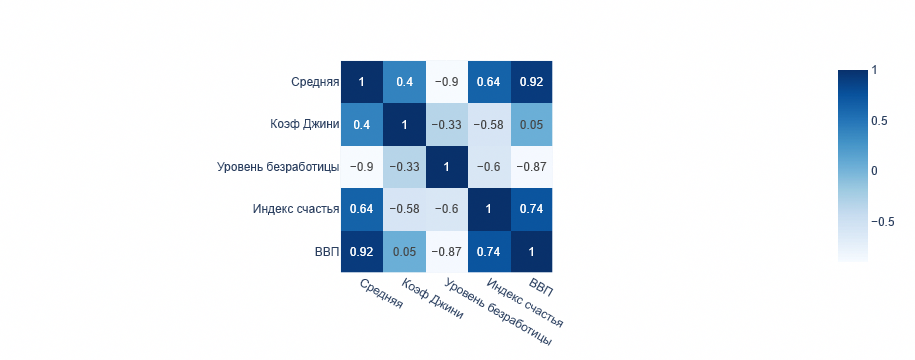

In [19]:
# строим корреляционную матрицу реальных зарплат и дополнительных показателей
dt = data_2000.transpose()
dt = dt.rename(columns=dt.iloc[0])
dt = dt[1:]
dt.index.name = 'Год'
dt.index = dt.index.astype(int)
dt = dt[['Средняя']]

dt = dt.merge(add, left_index=True, right_index=True).corr().round(2)

fig = px.imshow(dt, text_auto=True, color_continuous_scale=px.colors.sequential.Blues)

pyo.iplot(fig)

### Выводы
1. Сильная корреляция средней з/п с ВВП. Менее выраженная корреляция с индексом счастья и коэффициентом Джини.
2. Сильная обратная корреляция средней з/п с уровнем безработицы.